# Assignment 3 - Pie Charts

***

Pandas is used to load data from a URL and create a pie-chart. 

The goal is to extract domain names from email addresses in the CSV file and visualise them using a pie chart.

In [37]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy

We can use pandas built-in function `read_csv()`

- - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [38]:
# define the URL where the CSV is stored
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

# load the data from the url into a DataFrame
df = pd.read_csv(url)

In [39]:
# display the dataframe (truncated)
df

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...,...
995,996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
996,997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
997,998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
998,999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


The email addresses have the pattern: username@domain

We can use this pattern to extract the domain name.

Start by reading the email address column (known as a Series). Then, use string operations to extract the domain name and store in a new Series called "Domain".

- https://docs.python.org/3/library/string.html

In [40]:
# get the email address column, then extract the domain names
df["Domain"] = df["Email"].str.split("@").str[1]

### String operations.

String operations require strings, so we use `str`. to convert the values from the Series to strings before operating on them.

    - https://www.w3schools.com/python/ref_func_str.asp

- The `.split()` method creates a list like this: [usernames, domains]

    - https://www.geeksforgeeks.org/python-string-split/

- The `.str[1]` accessor selects the second value in said list 

Accessors are a type of method that allow us to "access the state of the object"

-  https://www.geeksforgeeks.org/accessor-and-mutator-methods-in-python/



In [41]:
# create Series with the counts of each distinct variable (domain)
domain_count = df["Domain"].value_counts()

# display the Series
domain_count

Domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

The `value_counts()` method counts instances of each unique value and returns a Series contianing the value counts.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html

In [42]:
# we can check the datatype
print(type(domain_count))

<class 'pandas.core.series.Series'>


Pandas can easily generate pie charts using the `plot.pie()` method.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

<Axes: ylabel='count'>

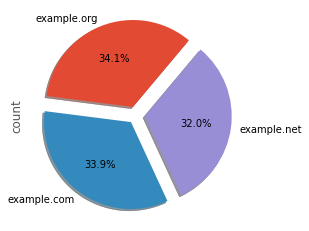

In [43]:
# plot a piechart, add percentage, explode the chart, and rotate
domain_count.plot.pie(autopct="%.1f%%", explode=(0.1, 0.1, 0.1), shadow=True, startangle=50)
# 3 args for explode, as there are 3 variables